<a href="https://colab.research.google.com/github/grzechu420/AI-P3/blob/main/p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Wprowadzenie - klasyfikacja

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

DATASET_PATH = "BreastCancerData.csv"

In [2]:
# Wczytanie datasetu Breast Cancer
dataset = pd.read_csv(DATASET_PATH)

In [3]:
# Informacje o zestawie danych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
dataset = dataset.drop(columns="Unnamed: 32")

In [5]:
DATASET_FEATURE_LABELS = {

    "radius_mean": "radius_mean",
    "texture_mean": "texture_mean",
    "perimeter_mean": "perimeter_mean",
    "area_mean": "area_mean",
    "smoothness_mean": "smoothness_mean",
    "compactness_mean": "compactness_mean",
    "concavity_mean": "concavity_mean",
    "concave points_mean": "concave points_mean",
    "symmetry_mean": "symmetry_mean",
    "fractal_dimension_mean": "fractal_dimension_mean",
    "radius_worst": "radius_worst",
    "texture_worst": "texture_worst",
    "perimeter_worst": "perimeter_worst",
    "area_worst": "area_worst",
    "smoothness_worst": "smoothness_worst",
    "compactness_worst": "compactness_worst",
    "concavity_worst": "concavity_worst",
    "concave points_worst": "concave points_worst",
    "symmetry_worst": "symmetry_worst",
    "fractal_dimension_worst": "fractal_dimension_worst"

}

In [6]:
# Zmiana nazwy kolumn
dataset.replace(to_replace=["M","B"], value = ['Złośliwy','Łagodny'], inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Usunięcie zbędnych kolumn
dataset = dataset.drop(columns=['id'])
dataset = dataset.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])
dataset = dataset.drop(columns=['fractal_dimension_mean'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_worst             569 non-null    float64
 11  texture_worst            569 non-null    float64
 12  perimeter_worst          569 non-null    float64
 13  area_worst               569 non-null    float64
 14  smoothness_worst         5

### Brakujące dane

In [8]:
# Znalezienie brakujących danych
dataset.isnull().any()
# W rzędzie jest brakująca wartość
isnull = dataset.isnull().any(axis=1)
print(np.count_nonzero(isnull),"brakujących wartości.")
# Usunięcie rzędu
dataset = dataset.drop(np.asarray(isnull).nonzero()[0].tolist() ,axis=0)

0 brakujących wartości.


In [9]:
# Podgląd pierwszych 10 rzędów
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Złośliwy,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Złośliwy,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Złośliwy,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Złośliwy,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Złośliwy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,Złośliwy,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,Złośliwy,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,Złośliwy,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,Złośliwy,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,Złośliwy,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Wydzielenie zmiennej zależnej, liczba klas

In [10]:
# Wydzielenie zmiennej zależnej (Y)
x,y = dataset.drop(columns=["diagnosis"]), dataset["diagnosis"]

In [11]:
# Określenie liczby klas
counts = y.value_counts()
counts

,count
diagnosis,
Łagodny,357
Złośliwy,212


In [12]:
# Współczynnik niezbalansowania
c_max, c_min = max(counts.values[0],counts.values[1]),min(counts.values[0],counts.values[1])
imbalance = c_max/c_min

print(f"Współczynnik niezbalansowania: {c_max} / {c_min} = {imbalance:.1f}")

Współczynnik niezbalansowania: 357 / 212 = 1.7


### EDA

In [13]:
# Podstawowa analiza statystyczna
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>],
       [<Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'radius_worst'}>,
        <Axes: title={'center': 'texture_worst'}>,
        <Axes: title={'center': 'perimeter_worst'}>],
       [<Axes: title={'center': 'area_worst'}>,
        <Axes: title={'center': 'smoothness_worst'}>,
        <Axes: title={'center': 'compactness_worst'}>,
        <Axes: title={'center': 'concavity_worst'}>],
       [<Axes: title={'center': 'concave points_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>,
        <Axes: title={'center': 'fractal_dimension_worst'

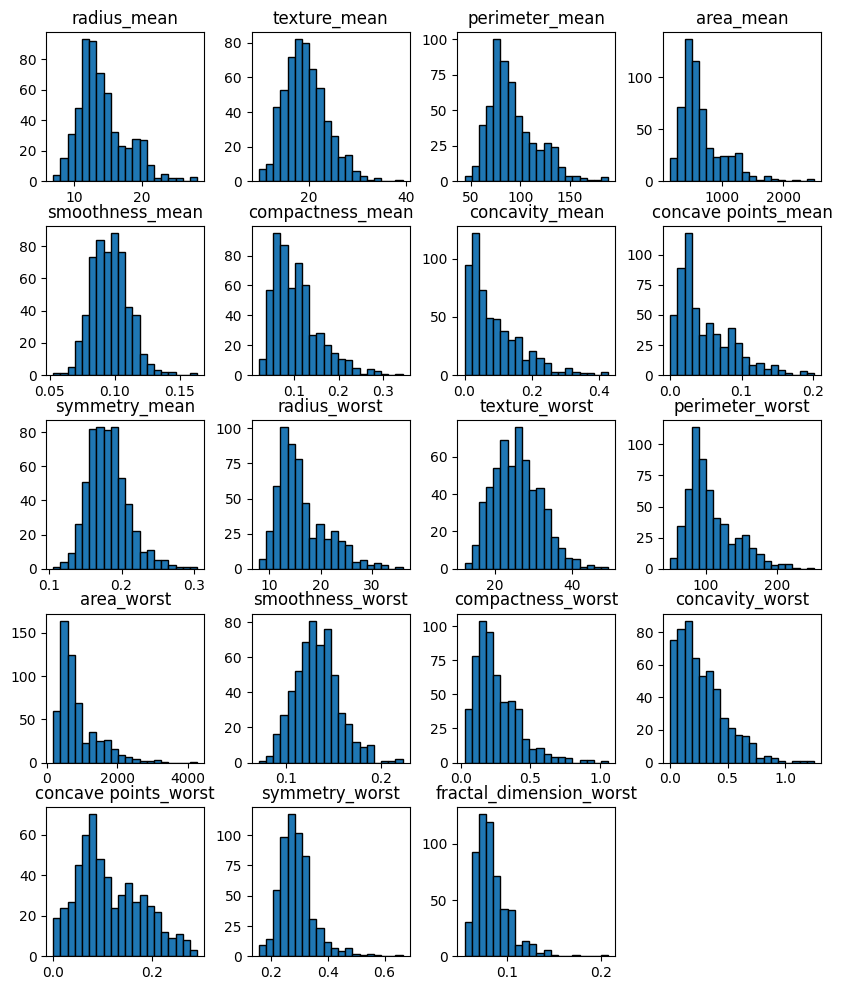

In [15]:
# Histogramy zmiennych niezależnych
x.hist(figsize=(10,12), bins=20, edgecolor='black', grid=False)

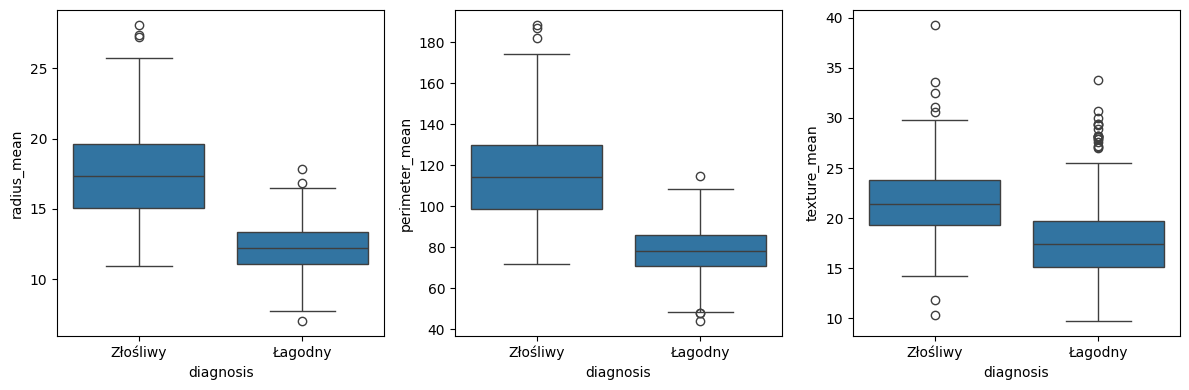

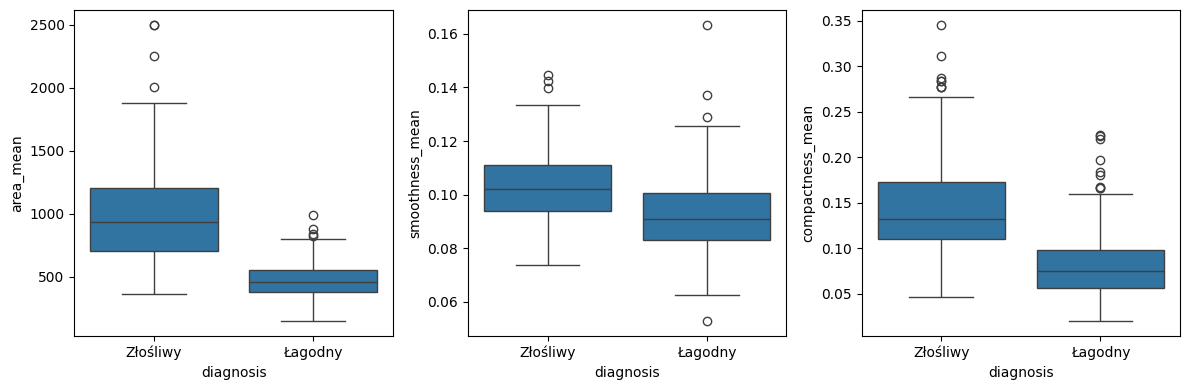

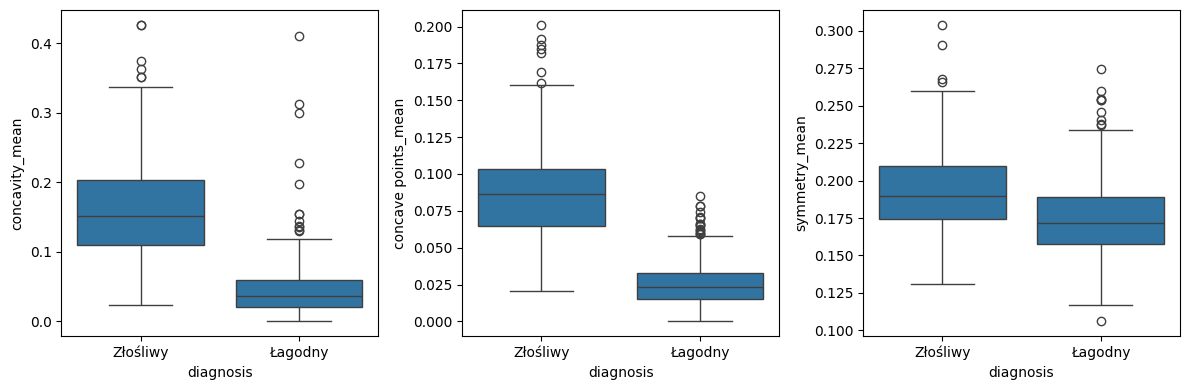

In [ ]:
# Analiza BOXPLOT

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x=y, y=x["radius_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["perimeter_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["texture_mean"], ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x=y, y=x["area_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["smoothness_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["compactness_mean"], ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(x=y, y=x["concavity_mean"], ax=axes[0])
sns.boxplot(x=y, y=x["concave points_mean"], ax=axes[1])
sns.boxplot(x=y, y=x["symmetry_mean"], ax=axes[2])

plt.tight_layout()
plt.show()



<Axes: >

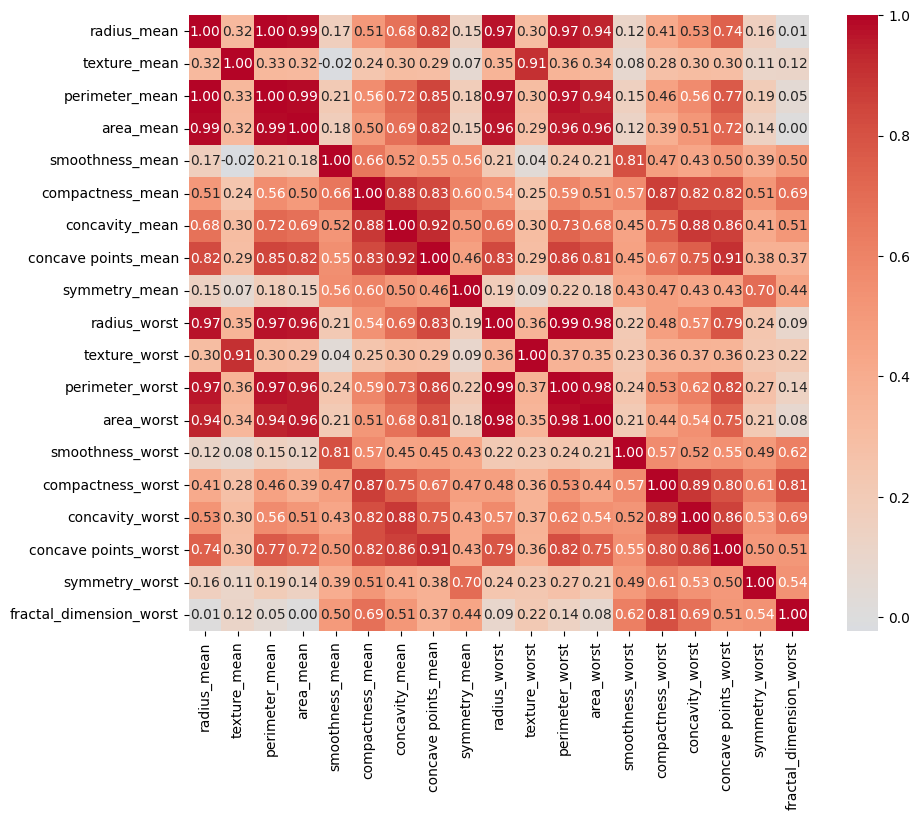

In [16]:
# Analiza korelacji pomiędzy zmiennymi

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(x.select_dtypes(exclude='object').corr(), ax=ax, annot=True, fmt=".2f", cmap="coolwarm", center=0)

### Modele klasyfikacji - SVM, kNN

In [17]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer


col_categorical = x.select_dtypes(include='object').columns
col_numerical = x.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

from  sklearn.preprocessing import LabelEncoder

# Enkodowanie zmiennej zależnej
le = LabelEncoder()
y = le.fit_transform(y)
y_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_name_mapping

{'Złośliwy': 0, 'Łagodny': 1}

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc = Pipeline([
    ('col_transformer', col_transformer),
    ('svc', SVC(kernel="linear", C=1.0)),
])

knn = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
])


### Walidacja krzyżowa dla domyślnych hiperparametrów

- Jaki wpływ na model może mieć podział danych wejściowych na zestaw treningowy i walidacyjny?
- Jak zachować się w przypadku małych zestawów danych?

-> **Walidacja krzyżowa**:
Zastosujemy walidację krzyżową aby porównać dwa modele - kNN oraz SVC.

In [19]:
from sklearn.model_selection import cross_validate

SCORING = ('accuracy', 'recall', 'precision', 'f1')

results = cross_validate(svc, x, y, cv=5, scoring=SCORING)

print("=====\nSVC:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

results = cross_validate(knn, x, y, cv=5, scoring=SCORING)

print("=====\nk-NN:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

=====
SVC:
=====
fit_time: 0.010
score_time: 0.013
test_accuracy: 0.975
test_recall: 0.986
test_precision: 0.975
test_f1: 0.980
=====
k-NN:
=====
fit_time: 0.009
score_time: 0.035
test_accuracy: 0.960
test_recall: 0.977
test_precision: 0.959
test_f1: 0.968


### Dobór hiperparametrów metodą GridSearch

In [20]:
# Listowanie parametrów SVC
svc['svc'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [21]:
# Listowanie parametrów k-NN
knn['knn'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [22]:
# Tuning hiperparametrów k-NN z wykorzystaniem GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
    'knn__metric': ['euclidean', 'cosine', 'cityblock', 'l1', 'l2', 'nan_euclidean'],
}
grid_search = GridSearchCV(knn, parameters)
grid_search.fit(x, y)

# Zastosowanie hiperparametrów
for param, val in grid_search.best_params_.items():
    knn.set_params(**{param: val})

grid_search.best_params_

{'knn__metric': 'cityblock', 'knn__n_neighbors': 5}

In [23]:
# Tuning hiperparametrów SVC z wykorzystaniem GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'svc__C': list(np.arange(0.1, 2.1, 0.1)),
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x, y)

# Zastosowanie hiperparametrów
for param, val in grid_search.best_params_.items():
    svc.set_params(**{param: val})

grid_search.best_params_

{'svc__C': 0.2, 'svc__kernel': 'linear'}

In [24]:
results = cross_validate(svc, x, y, cv=5, scoring=SCORING)

print("=====\nSVC:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

results = cross_validate(knn, x, y, cv=5, scoring=SCORING)

print("=====\nk-NN:\n=====")
for key in results.keys():
    print(f"{key}: {results[key].mean():.3f}")

=====
SVC:
=====
fit_time: 0.009
score_time: 0.013
test_accuracy: 0.981
test_recall: 0.992
test_precision: 0.978
test_f1: 0.985
=====
k-NN:
=====
fit_time: 0.007
score_time: 0.021
test_accuracy: 0.968
test_recall: 0.989
test_precision: 0.962
test_f1: 0.975


### DODATEK: Porównanie klasyfikatorów
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()